In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
import random
import pandas as pd
from sklearn.metrics import accuracy_score

x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)


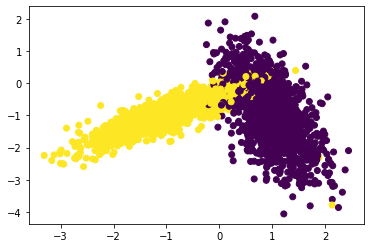

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

In [3]:
#https://stackoverflow.com/questions/61818704/building-a-custom-randomsearchcv-using-python
def RandomSearchCV(x_train,y_train, classifier, folds,p):
    trainscores = []
    testscores = []

    #1. Generating 10 unique values from given range
    params = p
    x_train_split = []
    y_train_split = []
    #dividing x_train into groups
    for i in range(0, len(x_train), int(len(x_train)/folds)):
        x_train_split.append(x_train[i:i+int(len(x_train)/folds)])
        y_train_split.append(y_train[i:i+int(len(y_train)/folds)])

    #3.for each hyperparameter that we generated in step 1 and dividing dataset into training and CV datasets:

    for parameter in params:
        trainscores_folds = []
        testscores_folds  = []

        for group in range(len(x_train_split)):
            x_train_group = np.concatenate(x_train_split[0:group]+ x_train_split[group+1:])
            x_cv_group = x_train_split[group]
            y_train_group =np.concatenate(y_train_split[0:group]+y_train_split[group+1:])
            y_cv_group = y_train_split[group]

            #classifier (K-NN)
            classifier.n_neighbors = parameter
            classifier.fit(x_train_group, y_train_group)

            #Predicton
            y_pred = classifier.predict(x_cv_group)
            testscores_folds.append(accuracy_score(y_cv_group, y_pred))

            y_pred = classifier.predict(x_train_group)
            trainscores_folds.append(accuracy_score(y_train_group, y_pred))

        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))

    return trainscores, testscores

None


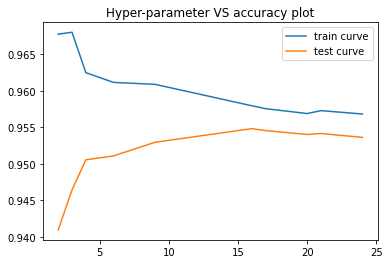

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")   

p=random.sample(range(1, 25), 10)
print(p.sort())
params = {'n_neighbors':p}

folds=3

classifier = KNeighborsClassifier()
trainscores,testscores=RandomSearchCV(X_train,y_train, classifier, folds,p)

plt.plot(params['n_neighbors'],trainscores, label='train curve')
plt.plot(params['n_neighbors'],testscores, label='test curve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

Based on the above graph, we can select the hyperparameter as 21

In [5]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

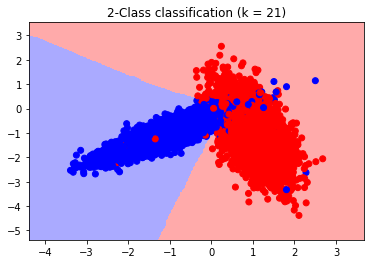

In [6]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 21)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

### Conclusion:
From the above options of K, as per my understanding K= 21.

## RandomizedSearchCV function


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import random
import warnings
warnings.filterwarnings("ignore")

Xdemo,ydemo = make_classification(n_samples=10000, n_features=4, n_informative=4, n_redundant= 0, n_clusters_per_class=1, random_state=60)
Xdemo_train, Xdemo_test, ydemo_train, ydemo_test = train_test_split(Xdemo,ydemo,stratify=ydemo,random_state=42)


random_number=random.sample(range(1, 25),10)
neigh=KNeighborsClassifier()
p={'n_neighbors':y}
knnmodel_Randomized=RandomizedSearchCV(estimator=neigh, param_distributions=p,scoring='accuracy',cv=5, n_jobs=-1)
knnmodel_Randomized.fit(Xdemo_train, ydemo_train)
print(knnmodel_Randomized.best_estimator_)

KNeighborsClassifier(n_neighbors=1)


In [12]:
neigh_best_K=KNeighborsClassifier(n_neighbors=1)
neigh_best_K.fit(Xdemo_train,ydemo_train)
predicted_y=neigh_best_K.predict(Xdemo_test)
print(predicted_y)
print(ydemo_test)

[0 1 0 ... 1 0 0]
[0 1 0 ... 1 0 0]


In [13]:
import pandas as pd
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(ydemo_test, predicted_y)
df=pd.DataFrame(matrix)
print(matrix)

[[1232   18]
 [   9 1241]]


Text(30.5, 0.5, 'Predicted')

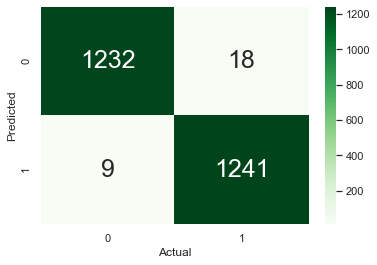

In [14]:
import seaborn as sns
sns.set(font_scale=1) 
sns.heatmap(df,annot=True,annot_kws={"size": 25},fmt ="g", cmap='Greens') 
plt.xlabel("Actual") 
plt.ylabel("Predicted")

In [15]:
acc=accuracy_score(ydemo_test, predicted_y)
print(acc*100)

98.92
